# Análisis datos peleas ponderadas

## Índice

* [Lectura de datos](#lectura-de-datos)
* [Boxplots](#boxplot)
* [Histogramas](#histogramas)
* [Correlación con la variable objetivo](#correlacion-con-la-variable-objetivo)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy.stats import pointbiserialr

## Lectura de datos

In [2]:
import os

ruta = os.path.join(os.getcwd(), "..", "..", "data", "processed", "peleas_ponderadas.parquet")
df = pd.read_parquet(ruta)
df.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_A,KD_B,SIG_STR_A,SIG_STR_B,TD_PORC_A,TD_PORC_B,...,Puntos_A,Puntos_B,Peleas_A,Peleas_B,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF
0,2000-06-09,Kevin Randleman,Pedro Rizzo,False,0.00,0.60,0.2956,0.3724,0.8344,0.0000,...,0.141818,8.559721,3,3,-0.60,-0.0768,0.650000,0.72,0.00,378.72
1,2000-09-22,Jeremy Horn,Eugene Jackson,False,0.00,0.64,0.6996,0.5160,0.1680,0.0000,...,10.140684,0.000000,3,3,-0.64,0.1836,0.315789,0.80,0.00,-2.24
2,2001-02-23,Tito Ortiz,Evan Tanner,False,0.24,0.00,0.4776,0.7144,0.8704,1.0000,...,9.430205,8.356971,5,3,0.24,-0.2368,0.221893,-1.12,0.00,600.96
3,2001-05-04,Chuck Liddell,Kevin Randleman,False,0.00,0.00,0.5048,0.4496,0.0000,0.6960,...,4.715094,0.000000,3,5,0.00,0.0552,-0.508475,-1.64,0.40,-601.12
4,2001-06-29,Pat Miletich,Shonie Carter,False,0.00,0.72,0.4664,0.5272,0.6400,0.6896,...,0.000000,10.112208,5,3,-0.72,-0.0608,0.022094,0.88,-1.12,-122.28


In [3]:
print("Columnas del DataFrame:")
print(df.columns)

Columnas del DataFrame:
Index(['DATE', 'Peleador_A', 'Peleador_B', 'WINNER', 'KD_A', 'KD_B',
       'SIG_STR_A', 'SIG_STR_B', 'TD_PORC_A', 'TD_PORC_B', 'SUB_ATT_A',
       'SUB_ATT_B', 'REV_A', 'REV_B', 'CTRL_A', 'CTRL_B', 'TOTAL_STR_A_x',
       'TOTAL_STR_B_x', 'TOTAL_STR_A_y', 'TOTAL_STR_B_y', 'TD_A_x', 'TD_B_x',
       'TD_A_y', 'TD_B_y', 'STR_HEAD_A_x', 'STR_HEAD_B_x', 'STR_HEAD_A_y',
       'STR_HEAD_B_y', 'STR_BODY_A_x', 'STR_BODY_B_x', 'STR_BODY_A_y',
       'STR_BODY_B_y', 'STR_LEG_A_x', 'STR_LEG_B_x', 'STR_LEG_A_y',
       'STR_LEG_B_y', 'STR_DISTANCE_A_x', 'STR_DISTANCE_B_x',
       'STR_DISTANCE_A_y', 'STR_DISTANCE_B_y', 'STR_CLINCH_A_x',
       'STR_CLINCH_B_x', 'STR_CLINCH_A_y', 'STR_CLINCH_B_y', 'STR_GROUND_A_x',
       'STR_GROUND_B_x', 'STR_GROUND_A_y', 'STR_GROUND_B_y', 'STRIKER_A',
       'STRIKER_B', 'GRAPPLER_A', 'GRAPPLER_B', 'Victorias_KO_A',
       'Victorias_KO_B', 'Victorias_Sub_A', 'Victorias_Sub_B',
       'Victorias_Decision_A', 'Victorias_Decision_B', 'Der

In [4]:
print("\nTipos de datos:")
print(df.dtypes.to_string())


Tipos de datos:
DATE                    datetime64[ns]
Peleador_A                      object
Peleador_B                      object
WINNER                            bool
KD_A                           float64
KD_B                           float64
SIG_STR_A                      float64
SIG_STR_B                      float64
TD_PORC_A                      float64
TD_PORC_B                      float64
SUB_ATT_A                      float64
SUB_ATT_B                      float64
REV_A                          float64
REV_B                          float64
CTRL_A                         float64
CTRL_B                         float64
TOTAL_STR_A_x                  float64
TOTAL_STR_B_x                  float64
TOTAL_STR_A_y                  float64
TOTAL_STR_B_y                  float64
TD_A_x                         float64
TD_B_x                         float64
TD_A_y                         float64
TD_B_y                         float64
STR_HEAD_A_x                   float64
STR_HEAD

## Análisis descriptivo numérico

Realizamos un análisis descriptivo de las variables numéricas para comprender mejor sus distribuciones 
y las frecuencias con las que ocurren ciertos eventos en las peleas. Por ejemplo, observamos que el número 
de knockdowns (KD) suele ser 0 en la mayoría de los combates, mientras que el número total de golpes conectados
(TOTAL_STR_A_x) suele superar los 55.

Este análisis también nos permite verificar si la extracción y transformación de los datos se ha realizado 
correctamente. De hecho, detectamos que algunos porcentajes estaban guardándose en una escala de 0 a 100 en
lugar de 0 a 1, lo que pudimos corregir gracias a esta exploración descriptiva.

In [5]:
print("\nResumen estadístico de columnas numéricas:")
pd.set_option('display.max_columns', None)
print(df.describe(include='all'))


Resumen estadístico de columnas numéricas:
                                 DATE       Peleador_A       Peleador_B  \
count                            3476             3476             3476   
unique                            NaN              898             1111   
top                               NaN  Andrei Arlovski  Jeremy Stephens   
freq                              NaN               23               18   
mean    2017-11-26 14:50:15.880322048              NaN              NaN   
min               2000-06-09 00:00:00              NaN              NaN   
25%               2014-08-16 00:00:00              NaN              NaN   
50%               2018-07-14 00:00:00              NaN              NaN   
75%               2022-03-05 00:00:00              NaN              NaN   
max               2025-02-15 00:00:00              NaN              NaN   
std                               NaN              NaN              NaN   

       WINNER         KD_A         KD_B    SIG_STR_A   

In [6]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['KD_A', 'KD_B', 'SIG_STR_A', 'SIG_STR_B', 'TD_PORC_A', 'TD_PORC_B',
       'SUB_ATT_A', 'SUB_ATT_B', 'REV_A', 'REV_B', 'CTRL_A', 'CTRL_B',
       'TOTAL_STR_A_x', 'TOTAL_STR_B_x', 'TOTAL_STR_A_y', 'TOTAL_STR_B_y',
       'TD_A_x', 'TD_B_x', 'TD_A_y', 'TD_B_y', 'STR_HEAD_A_x', 'STR_HEAD_B_x',
       'STR_HEAD_A_y', 'STR_HEAD_B_y', 'STR_BODY_A_x', 'STR_BODY_B_x',
       'STR_BODY_A_y', 'STR_BODY_B_y', 'STR_LEG_A_x', 'STR_LEG_B_x',
       'STR_LEG_A_y', 'STR_LEG_B_y', 'STR_DISTANCE_A_x', 'STR_DISTANCE_B_x',
       'STR_DISTANCE_A_y', 'STR_DISTANCE_B_y', 'STR_CLINCH_A_x',
       'STR_CLINCH_B_x', 'STR_CLINCH_A_y', 'STR_CLINCH_B_y', 'STR_GROUND_A_x',
       'STR_GROUND_B_x', 'STR_GROUND_A_y', 'STR_GROUND_B_y', 'STRIKER_A',
       'STRIKER_B', 'GRAPPLER_A', 'GRAPPLER_B', 'Victorias_KO_A',
       'Victorias_KO_B', 'Victorias_Sub_A', 'Victorias_Sub_B',
       'Victorias_Decision_A', 'Victorias_Decision_B', 'Derrotas_KO_A',
       'Derrotas_KO_B', 'Derrotas_Sub_A', 'Derrotas_Sub_B',
    

## BoxPlot

Al mostrar los Box-Plot nos damos cuenta de que en muchos casos
existe una cola a la derecha ya que, por ejemplo en los intentos de derribo,
lo normal es que ocurran muy pocos concentrandose ahí la mayoría de los valores,
sin embargo en algunos combates ocurren mucho creando esa cola. Esto vemos que pasa con
bastantes variables. Para mejorar eso deberíamos estudiar realizar ciertas transformaciones.

También vemos gráficos en los cuales la distancia intercuartílica es mínima ya que, por ejemplo los knockdowns
o intentos de sumisión suelen no ocurrir ni una vez en los combates, esto se puede ver en el dataframe explicando
cada variable donde vemos que variables como los knockdowns (KD_A y KD_B) el 75% es 0 y tiene una media de 0.24,
haciendo que se queden esos gráficos tan raros con la caja prácticamente siendo una línea. En cuanto a estas variables
habrá que estudiar si aportan algo al crear el modelo al ser tan generales.

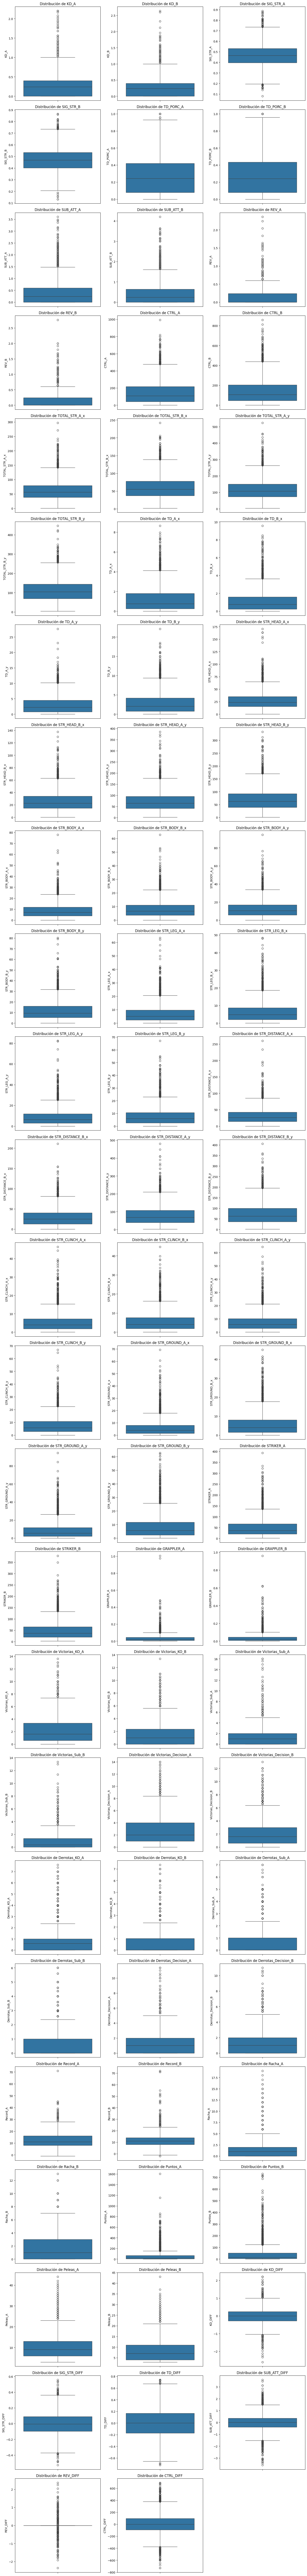

In [7]:
# Número de columnas
cols = 3

# Calcula el número de filas necesarias para los gráficos
rows = (len(numerical_columns) + cols - 1) // cols  # Redondeo hacia arriba

# Crear la figura
plt.figure(figsize=(5 * cols, 5 * rows))

# Crear los subgráficos
for i, col in enumerate(numerical_columns):
    plt.subplot(rows, cols, i + 1)  # Definir filas y columnas
    sns.boxplot(y=df[col])  # Usar 'y' para boxplot en vertical
    plt.title(f"Distribución de {col}")

# Ajustar la disposición para que no se sobrepongan
plt.tight_layout()

# Mostrar la figura
plt.show()


## Histogramas

Como vemos en los histogramas las variables no siguen distribuciones normales
y predomina, como ya habíamos visto con los boxplots las colas hacía la derecha. Intentaremos
utilizar todos los datos ya que no parecen errores de la página y en caso de que sea un problema para el 
modelo eliminaremos algunos valores atípicos.

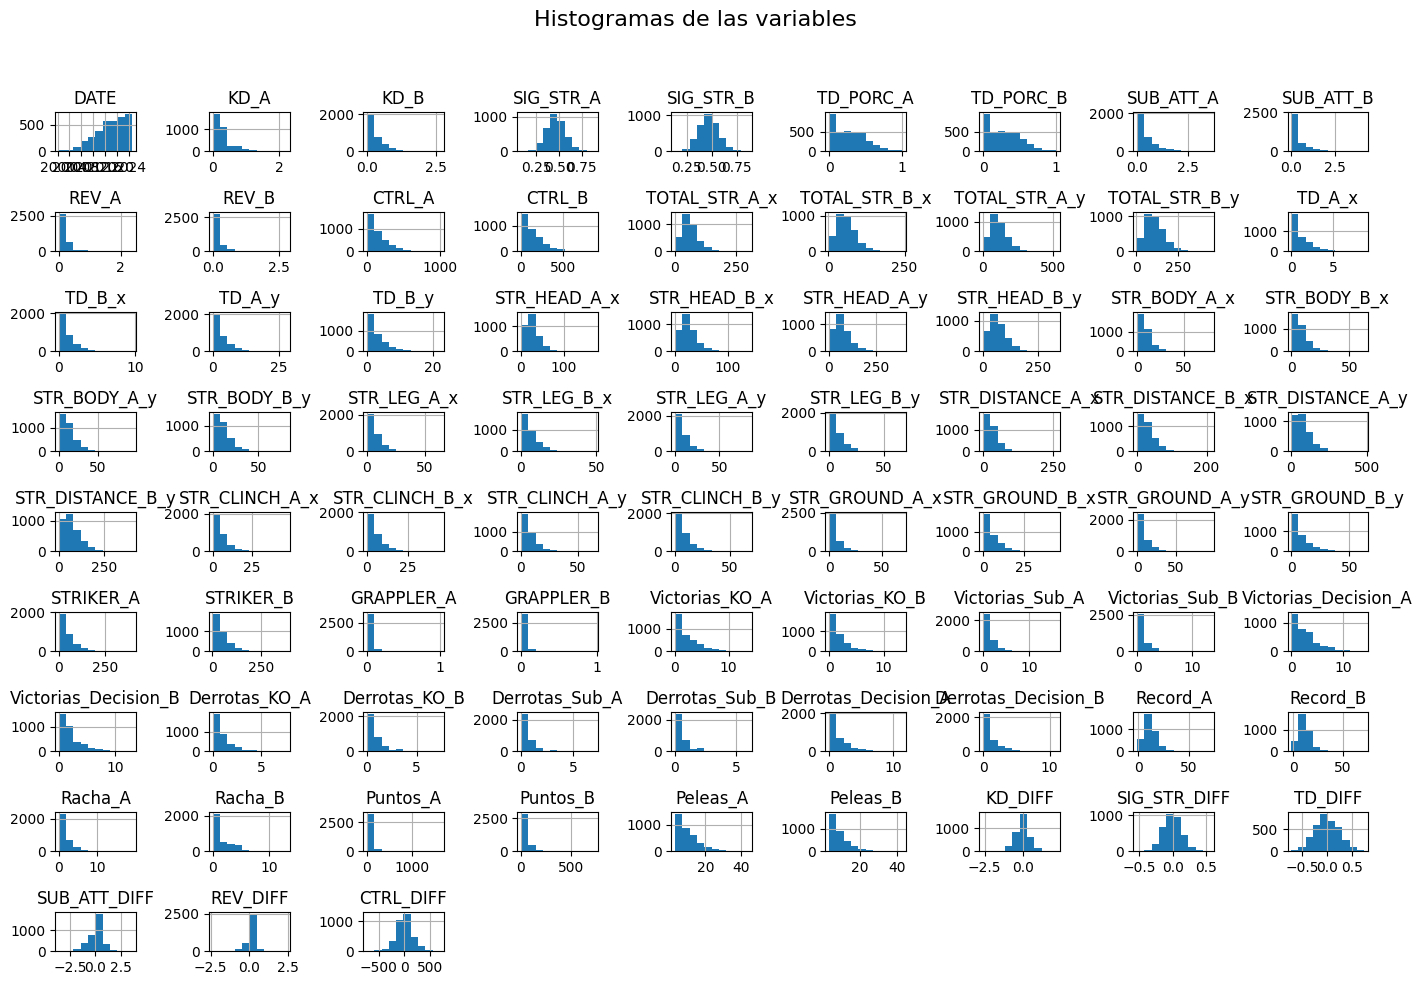

In [8]:
df.hist(figsize=(14, 10))
plt.suptitle("Histogramas de las variables", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Correlacion con la variable objetivo

In [9]:
import pandas as pd
from scipy.stats import pointbiserialr

df_numericas = df.select_dtypes(include=["number"])

resultados = []

for col in df_numericas.columns:
    corr, p_value = pointbiserialr(df["WINNER"], df[col])
    resultados.append({"Variable": col, "Correlación": round(corr, 3), "P-valor": round(p_value, 5)})

# Convertir en DataFrame
df_corr = pd.DataFrame(resultados)

# Ordenar por correlación absoluta
df_corr = df_corr.assign(abs_corr=df_corr["Correlación"].abs()).sort_values(by="abs_corr", ascending=False).drop(columns="abs_corr")

# Mostrar tabla
print(df_corr)


                Variable  Correlación  P-valor
58   Derrotas_Decision_A        0.113  0.00000
42        STR_GROUND_A_y       -0.108  0.00000
54         Derrotas_KO_A        0.108  0.00000
66              Peleas_A        0.103  0.00000
62               Racha_A       -0.099  0.00000
..                   ...          ...      ...
45             STRIKER_B       -0.006  0.72658
64              Puntos_A       -0.006  0.70299
53  Victorias_Decision_B        0.004  0.81911
47            GRAPPLER_B       -0.001  0.94036
50       Victorias_Sub_A        0.000  0.99693

[74 rows x 3 columns]


C:\Users\andre\AppData\Local\Temp\ipykernel_3616\399455787.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Correlación", y="Variable", data=df_corr_sig, palette="viridis")


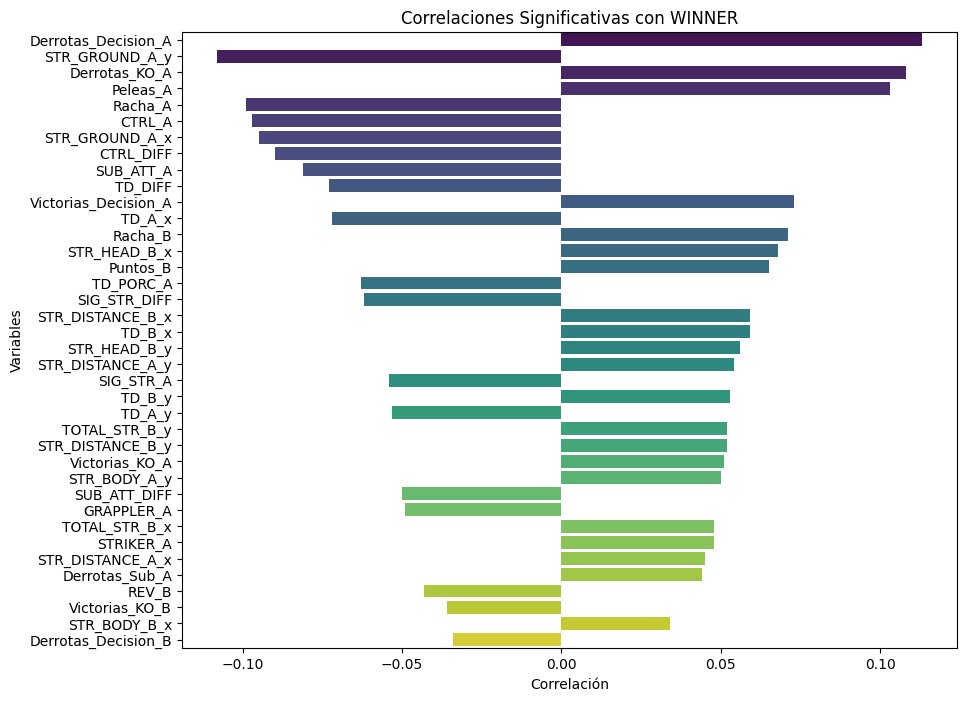

In [10]:
# Filtrar solo las correlaciones significativas (p-valor < 0.05)
df_corr_sig = df_corr[df_corr["P-valor"] < 0.05]

# Ordenar por la correlación absoluta
df_corr_sig = df_corr_sig.sort_values(by="Correlación", key=abs, ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x="Correlación", y="Variable", data=df_corr_sig, palette="viridis")
plt.title("Correlaciones Significativas con WINNER")
plt.xlabel("Correlación")
plt.ylabel("Variables")
plt.show()


Al comparar las correlaciones antes y después de calcular la media ponderada de los combates pasados, observamos que algunas variables que inicialmente mostraban una fuerte relación con la variable objetivo "WINNER" han disminuido su correlación o incluso han desaparecido de la lista de variables significativamente relacionadas.

Esto sugiere que, al promediar los datos de combates previos, se pierde parte de la información relevante para predecir el resultado de una pelea. Es posible que la variabilidad individual de cada combate, como el estado de forma actual del peleador o factores específicos de cada enfrentamiento, se diluya en el proceso de agregación.

Como consecuencia, los modelos que utilicen este nuevo conjunto de datos basado en promedios ponderados podrían no ser tan precisos como aquellos que trabajan directamente con los datos reales de cada pelea. La reducción en la fuerza de las correlaciones indica que el modelo podría perder capacidad predictiva al no capturar ciertas dinámicas clave que estaban presentes en los datos originales